<a href="https://colab.research.google.com/github/charmdust/LLMs-senolytics/blob/main/Finetune_Senolytics_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test out a custom trainer that takes class weights into account

In [1]:
# Upload csv file of senolytics dataset
from google.colab import files

uploaded_files = files.upload()

Saving list_of_compounds_for_training.csv to list_of_compounds_for_training (1).csv


In [2]:
import pandas as pd

In [127]:
# Senolytoc dataset - labelled
senolytics_df = pd.read_csv('list_of_compounds_for_training.csv')
senolytics_df

,Name,senolytic,Library,Source,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,Azaguanine-8,0,Prestwick,Not identified,c12/N=C(\NC(c1nn[nH]2)=O)/N,3.024307,441.024163,7.844935,5.327239,5.327239,...,0,0,0,0,0,0,0,0,0,0.430316
1,Allantoin,0,Prestwick,Not identified,N1C(NC(C1=O)NC(=O)N)=O,2.534439,225.377060,8.430721,5.379445,5.379445,...,0,0,0,0,0,0,0,0,2,0.325138
2,Acetazolamide,0,Prestwick,Not identified,c1(S(=O)(=O)N)sc(nn1)NC(=O)C,2.938691,422.352468,10.060478,6.513019,8.146012,...,1,0,0,0,0,0,0,0,0,0.631859
3,Metformin hydrochloride,0,Prestwick,Not identified,C(NC(=N)N)(=N)N(C)C,3.644486,126.919685,7.439158,5.524564,5.524564,...,0,0,0,0,0,0,0,0,0,0.248785
4,Atracurium besylate,0,Prestwick,Not identified,[N+]1(C(c2c(cc(c(c2)OC)OC)CC1)Cc1cc(c(cc1)OC)O...,0.987040,2158.836594,48.141042,41.328212,41.328212,...,0,0,0,0,0,0,0,4,0,0.038349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,Curcumin,1,"GPNCL, ENZO","Source 12 - Yousefzadeh et al, 2018",COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...,1.958861,822.040000,19.811190,15.008030,15.008030,...,0,0,0,0,0,0,0,0,0,0.548123
2519,Dasatinib,1,"Unknown library, see publication source","Source 13 - Zhu et al, 2015",CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=CC(=NC(...,1.431593,1111.432171,23.371668,18.507135,20.079560,...,0,0,0,0,1,0,0,0,0,0.465717
2520,Navitoclax,1,"Unknown library, see publication source","Source 14 - Zhu et al, 2016",CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...,1.017180,2532.551918,46.408991,36.449290,39.654708,...,1,1,0,0,0,0,0,0,0,0.104649
2521,A1331852,1,"Unknown library, see publication source","Source 15 - Zhu et al, 2017",O=C(NC1=NC(C=CC=C2)=C2S1)C3=C(CN(C4=CC=C(C5=C(...,0.969918,2030.733706,32.569974,26.984648,27.801144,...,0,0,0,0,1,0,0,0,0,0.185260


In [128]:
training_df = senolytics_df[['SMILES', 'senolytic']]
training_df

,SMILES,senolytic
0,c12/N=C(\NC(c1nn[nH]2)=O)/N,0
1,N1C(NC(C1=O)NC(=O)N)=O,0
2,c1(S(=O)(=O)N)sc(nn1)NC(=O)C,0
3,C(NC(=N)N)(=N)N(C)C,0
4,[N+]1(C(c2c(cc(c(c2)OC)OC)CC1)Cc1cc(c(cc1)OC)O...,0
...,...,...
2518,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...,1
2519,CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=CC(=NC(...,1
2520,CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...,1
2521,O=C(NC1=NC(C=CC=C2)=C2S1)C3=C(CN(C4=CC=C(C5=C(...,1


In [61]:
# # Subset for testing new code

# training_df =  training_df.groupby('senolytic', group_keys=False).apply(lambda x: x.sample(frac=0.2))
# training_df



,SMILES,senolytic
952,[C@@]12(\C(\C=C/[C@@]3([C@@]1(CC[C@@]1([C@@]4(...,0
1805,[I-].C[N+]1(C)CCN(CC1)C1=CC=CC=C1,0
1038,N1(c2c(Sc3c1cccc3)ccc(c2)C(=O)C)CCCN1CCC(CC1)CCO,0
2205,Cl.NCC(O)C1=CC=C(O)C=C1,0
1077,c1(ccc(cc1)O)C(O)CNC,0
...,...,...
2508,C1C(=CC2=CC=CC=C2F)C(=O)C(=CC3=CC=CC=C3F)CN1.Cl,1
2499,C[C@]12C[C@H]([C@H]3[C@H]([C@]1(CC[C@@H]2C4=CC...,1
2519,CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=CC(=NC(...,1
2493,CC1CC(C(C(C=C(C(C(C=CC=C(C(=O)NC2=CC(=O)C(=C(C...,1


In [129]:
# Check sample is representative of the actual distribution
sum(training_df['senolytic'])/len(training_df)

0.022988505747126436

## Setup  
from https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Transfer_Learning_With_ChemBERTa_Transformers.ipynb

In [5]:
# !curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
# import conda_installer
# conda_installer.install()
# !/root/miniconda/bin/conda info -e

In [6]:
# #!pip install --pre deepchem
# import deepchem
# deepchem.__version__

In [7]:
#from rdkit import Chem

Imports from https://github.com/seyonechithrananda/bert-loves-chemistry/blob/master/chemberta/visualization/ChemBERTA_dimensionaliy_reduction_BBBP.ipynb

In [130]:
import os
import time
from typing import List

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#from rdkit import Chem, DataStructs
#from rdkit.Chem.rdchem import Mol
#from rdkit.Chem.MolStandardize.rdMolStandardize import LargestFragmentChooser


In [9]:
# On Google Colab, you may need to restart the runtime after this
!pip install requests bs4 transformers torch torchvision umap-learn matplotlib dill ortools
!pip install --upgrade plotly

## Finetune
https://huggingface.co/docs/transformers/training

In [131]:
from transformers import AutoTokenizer, AutoModel, AutoConfig, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
config = AutoConfig.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
config.num_hidden_layers += 1
model = AutoModelForSequenceClassification.from_pretrained("DeepChem/ChemBERTa-77M-MTR", num_labels=2, problem_type = "single_label_classification")

print(f"Model size: {model.num_parameters()} parameters.")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model size: 3428210 parameters.


In [132]:
from sklearn.model_selection import train_test_split
X = training_df[['SMILES']]
y = training_df['senolytic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # the data should be shuffled

In [133]:
# Dataset set up

smiles_train = X_train['SMILES'].astype(str).tolist()
smiles_test = X_test['SMILES'].astype(str).tolist()


In [13]:
# # https://huggingface.co/transformers/v3.2.0/custom_datasets.html -> does not work!!
# from transformers import AutoTokenizer, AutoModel
# import torch


# class SenolyticsDataset(torch.utils.data.Dataset):
#     def __init__(self, encodings, labels):
#         self.encodings = encodings
#         self.labels = labels

#     def __getitem__(self, idx):
#         #print(idx)
#         input_ids = torch.tensor(self.encodings['input_ids'])
#         if self.labels is not None and idx in self.labels.keys():
#             target_ids = torch.tensor(self.labels[idx])
#         else:
#             # Handle the case where self.labels is None or idx is out of range
#             target_ids = None
#         return {"input_ids": input_ids, "labels": target_ids}

#     def __len__(self):
#         return len(self.labels)
# #train_dataset = IMDbDataset(train_encodings, train_labels)
# #val_dataset = IMDbDataset(val_encodings, val_labels)
# #test_dataset = IMDbDataset(test_encodings, test_labels)

# tokenized_train = tokenizer(smiles_train, padding=True, truncation=True, max_length=None, return_tensors='pt')
# tokenized_test = tokenizer(smiles_test, padding=True, truncation=True, max_length=None, return_tensors='pt')

# train_dataset = SenolyticsDataset(tokenized_train, y_train)
# test_dataset = SenolyticsDataset(tokenized_test, y_test)


In [174]:
import torch

#Current version
class Dataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, labels, tokenizer):
        self.dataframe = dataframe
        self.tokenizer = tokenizer

        # Tokenize the SMILES strings and store them
        self.encodings = self.tokenize_smiles(dataframe['SMILES'].tolist())

        # Store the labels
        self.labels = labels.tolist()

    def tokenize_smiles(self, smiles_list):
        return self.tokenizer(
            smiles_list,
            truncation=True,
            padding=True,
            max_length=None,
            return_tensors='pt'
        )

    def __getitem__(self, idx):
        item = {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': torch.tensor(self.labels[idx], dtype=torch.float)
        }
        return item

    def __len__(self):
        return len(self.labels)


In [175]:
train_dataset = Dataset(X_train, y_train, tokenizer)
test_dataset = Dataset(X_test, y_test, tokenizer)

In [176]:
type(train_dataset[-1]['input_ids'])

torch.Tensor

In [177]:
!pip install transformers[torch]

In [18]:
!pip install accelerate -U

In [162]:
from transformers import TrainingArguments, Trainer

# many more parameters to experiment with https://huggingface.co/docs/transformers/v4.33.2/en/main_classes/trainer#transformers.TrainingArguments
training_args = TrainingArguments(output_dir="test_1", load_best_model_at_end=True, evaluation_strategy='epoch',
    logging_strategy="epoch", save_strategy="epoch",per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,optim="adamw_torch", num_train_epochs=10) # switch optimizer to avoid warning)


In [20]:
!pip install evaluate

In [164]:
import numpy as np
import evaluate

metric = evaluate.load("f1")

In [165]:
# https://stackoverflow.com/questions/67457480/how-to-get-the-accuracy-per-epoch-or-step-for-the-huggingface-transformers-train

def compute_metrics(eval_pred):
    metrics = ["accuracy", "recall", "precision", "f1"] #List of metrics to return
    metric={}
    for met in metrics:
       metric[met] = evaluate.load(met)
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    metric_res={}
    for met in metrics:
       metric_res[met]=metric[met].compute(predictions=predictions, references=labels)[met]
    return metric_res

In [166]:
# Class weights

from sklearn.utils.class_weight import compute_class_weight



class_weights = compute_class_weight(class_weight="balanced",classes=np.unique(y_train),y=y_train)


print(class_weights)

[ 0.51166329 21.93478261]


In [202]:
# https://huggingface.co/docs/transformers/main/main_classes/trainer

from torch import nn
from transformers import Trainer


class CustomTrainer(Trainer):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels").long()
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss with class_weights=balanced from above
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, device=model.device, dtype=torch.float))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [203]:
from transformers import TrainerCallback
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Define a callback for printing validation loss
class PrintValidationLossCallback(TrainerCallback):
    def on_evaluate(self, args, state, control, **kwargs):
        if state is not None and hasattr(state, 'eval_loss'):
            print(f"Validation loss: {state.eval_loss:.4f}")

# Add the callback to the trainer
trainer.add_callback(PrintValidationLossCallback())
#trainer.train()

In [204]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.675600,1.531278,0.976238,0.000000,0.000000,0.000000
2,0.925500,1.328869,0.976238,0.000000,0.000000,0.000000
3,0.726000,1.314316,0.978218,0.083333,1.000000,0.153846
4,0.673200,1.350846,0.978218,0.083333,1.000000,0.153846
5,0.713800,1.122393,0.978218,0.166667,0.666667,0.266667
6,0.691400,1.134763,0.980198,0.250000,0.750000,0.375000
7,0.578300,1.159272,0.976238,0.250000,0.500000,0.333333
8,0.586900,1.163367,0.976238,0.250000,0.500000,0.333333
9,0.575400,1.159404,0.976238,0.250000,0.500000,0.333333
10,0.546500,1.164830,0.976238,0.250000,0.500000,0.333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=1270, training_loss=0.6692626352385274, metrics={'train_runtime': 3025.6841, 'train_samples_per_second': 6.67, 'train_steps_per_second': 0.42, 'total_flos': 94431885412800.0, 'train_loss': 0.6692626352385274, 'epoch': 10.0})

In [205]:
# Save the model
trainer.save_model("./output_1")

In [206]:
predictions = trainer.predict(test_dataset)

In [207]:
y_pred = np.argmax(predictions.predictions, axis=-1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [208]:
y_test.sum()

12

In [209]:
# senolytics predicted
y_pred.sum()

3

In [210]:
trainer.state.log_history



[{'loss': 0.6756, 'learning_rate': 4.5e-05, 'epoch': 1.0, 'step': 127},
 {'eval_loss': 1.5312784910202026,
  'eval_accuracy': 0.9762376237623762,
  'eval_recall': 0.0,
  'eval_precision': 0.0,
  'eval_f1': 0.0,
  'eval_runtime': 21.8161,
  'eval_samples_per_second': 23.148,
  'eval_steps_per_second': 0.367,
  'epoch': 1.0,
  'step': 127},
 {'loss': 0.9255, 'learning_rate': 4e-05, 'epoch': 2.0, 'step': 254},
 {'eval_loss': 1.3288694620132446,
  'eval_accuracy': 0.9762376237623762,
  'eval_recall': 0.0,
  'eval_precision': 0.0,
  'eval_f1': 0.0,
  'eval_runtime': 34.6507,
  'eval_samples_per_second': 14.574,
  'eval_steps_per_second': 0.231,
  'epoch': 2.0,
  'step': 254},
 {'loss': 0.726, 'learning_rate': 3.5e-05, 'epoch': 3.0, 'step': 381},
 {'eval_loss': 1.3143160343170166,
  'eval_accuracy': 0.9782178217821782,
  'eval_recall': 0.08333333333333333,
  'eval_precision': 1.0,
  'eval_f1': 0.15384615384615385,
  'eval_runtime': 23.8217,
  'eval_samples_per_second': 21.199,
  'eval_steps_

In [211]:
training_losses = [element['loss'] for element in trainer.state.log_history if 'loss' in element.keys()]
val_losses = [element['eval_loss'] for element in trainer.state.log_history if 'eval_loss' in element.keys()]

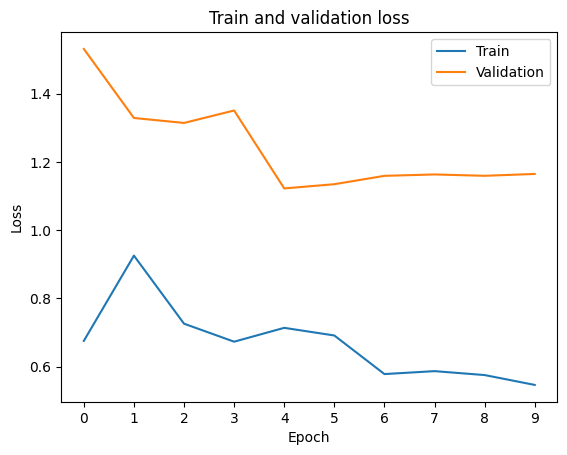

In [237]:
plt.plot(training_losses)
plt.plot(val_losses)
plt.title("Train and validation loss")
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.xticks([i for i in range(0,len(val_losses))])
plt.legend(['Train', 'Validation'])
plt.show()

Accuracy: 0.9782178217821782
Precision: 0.6666666666666666
Recall: 0.16666666666666666
F1: 0.26666666666666666




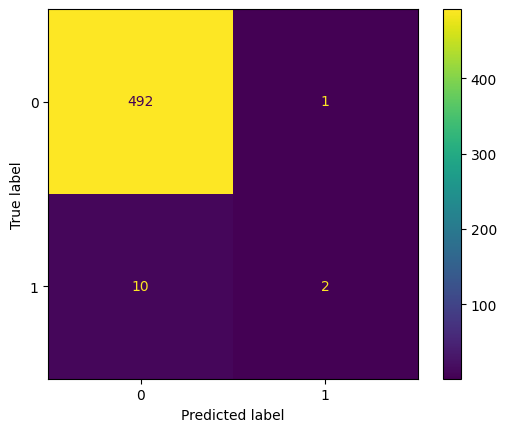

In [233]:
# NOTE 80:20 split

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay,
)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


print("\n")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()

plt.show()




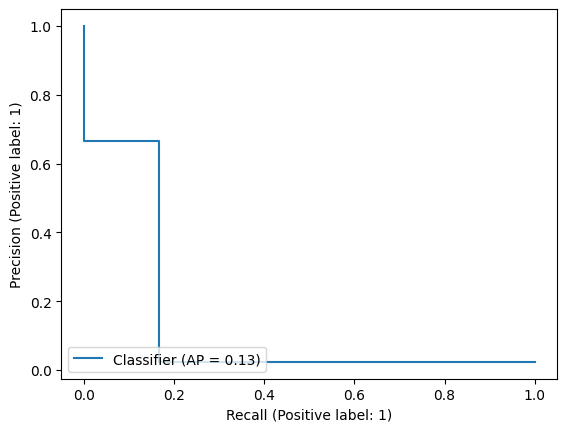

In [234]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html
from sklearn.metrics import (precision_recall_curve,
                              PrecisionRecallDisplay)

disp = PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.show()



In [245]:
# https://stackoverflow.com/questions/67432457/python-get-the-index-of-two-list-where-the-values-are-the-same
print([i for i, v in enumerate(list(y_pred)) if v == list(y_test)[i] and v==1])

[213, 244]


In [247]:
X_test.iloc[213]

SMILES    C[C@]12CC[C@@H](C[C@H]1CC[C@@H]3[C@@H]2CC[C@]4...
Name: 2510, dtype: object

In [248]:
X_test.iloc[244]

SMILES    C[C@@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2CC[C@@]3...
Name: 2500, dtype: object